In [18]:
import requests
from bs4 import BeautifulSoup
import networkx as nx

In [19]:
url = "https://www.mtr.com.hk/en/customer/services/system_map.html"

response = requests.get(url)
response.raise_for_status()

soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify())

<!DOCTYPE HTML>
<html lang="en">
 <head>
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src='https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);})(window,document,'script','dataLayer','GTM-KR5MZDK');
  </script>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <title>
   MTR &gt; System Map
  </title>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="" name="Author">
   <meta content="Train service,coverage,MTR stations,Tourist,Train Frequency,Service Hours,First Trains,Last Trains,Customer service ,Fares table, MTR Station Facilities,MTR Wi-Fi Services,MTR ATM Service,eInstant Bonus Terminals,Public Toilets in MTR  stations,MTR Facilities For Passengers With Disabilities,Faci

In [20]:
box_list = soup.find_all('div', class_='pulldownTableBox')
G = nx.Graph()
for box in box_list:
    arr = []
    tr_list = box.find_all('tr')
    for tr in tr_list[1:]:
        station_name = tr.find('td').text.strip()
        print(station_name)
        arr.append(station_name)
    for i in range(len(arr)-1):
        G.add_edge(arr[i], arr[i+1])

Tiu Keng Leng
Yau Tong
Lam Tin
Kwun Tong
Ngau Tau Kok
Kowloon Bay
Choi Hung
Diamond Hill
Wong Tai Sin
Lok Fu
Kowloon Tong
Shek Kip Mei
Prince Edward
Mong Kok
Yau Ma Tei
Ho Man Tin
Whampoa
Tsuen Wan
Tai Wo Hau
Kwai Hing
Kwai Fong
Lai King
Mei Foo
Lai Chi Kok
Cheung Sha Wan
Sham Shui Po
Prince Edward
Mong Kok
Yau Ma Tei
Jordan
Tsim Sha Tsui
Admiralty
Central
Kennedy Town
HKU
Sai Ying Pun
Sheung Wan
Central
Admiralty
Wan Chai
Causeway Bay
Tin Hau
Fortress Hill
North Point
Quarry Bay
Tai Koo
Sai Wan Ho
Shau Kei Wan
Heng Fa Chuen
Chai Wan
Admiralty
Ocean Park
Wong Chuk Hang
Lei Tung
South Horizons
LOHAS Park
Po Lam
Hang Hau
Tseung Kwan O
Tiu Keng Leng
Yau Tong
Quarry Bay
North Point
Hong Kong
Kowloon
Olympic
Nam Cheong
Lai King
Tsing Yi
Sunny Bay
Disneyland Resort
Tung Chung
Admiralty
Exhibition Centre
Hung Hom
Mong Kok East
Kowloon Tong
Tai Wai
Sha Tin
Fo Tan
Racecourse
University
Tai Po Market
Tai Wo
Fanling
Sheung Shui
Lo Wu
Lok Ma Chau
Tuen Mun
Siu Hong
Tin Shui Wai
Long Ping
Yuen Long


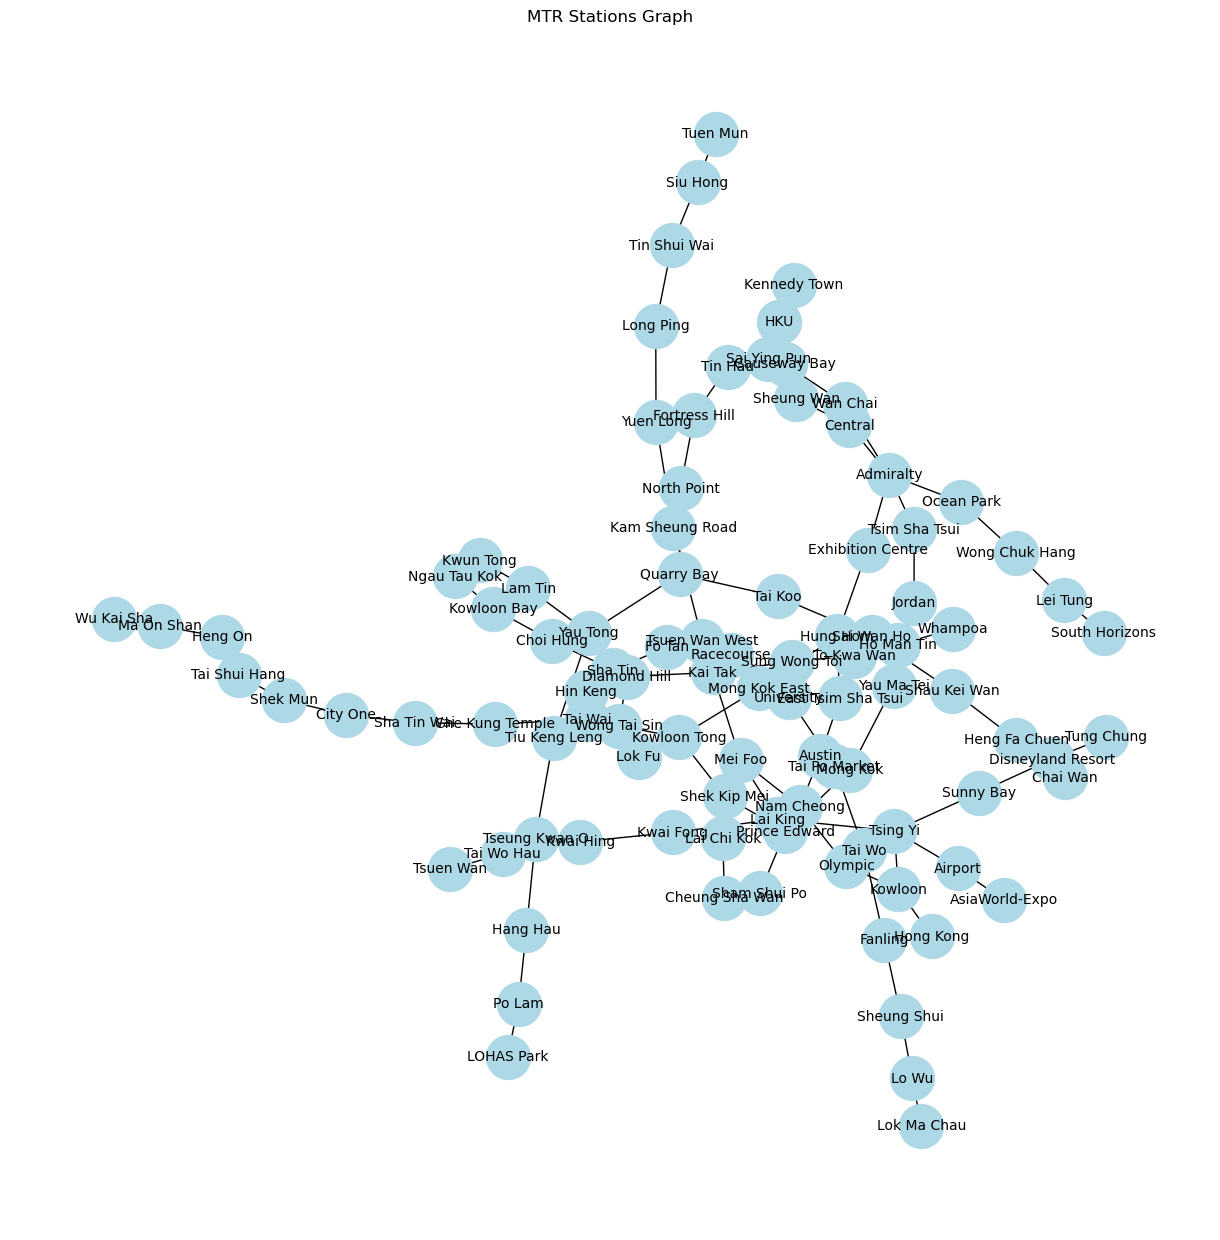

In [21]:
# plot the graph
import matplotlib.pyplot as plt
import networkx as nx
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_color='black')
plt.title("MTR Stations Graph")
plt.show()


In [24]:
# calculate the centrality of each station (max 3)
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 3 stations by degree centrality:")
for station, centrality in sorted_centrality[:3]:
    print(f"{station}: {centrality:.4f}")
# calculate the betweenness centrality of each station (max 3)
betweenness = nx.betweenness_centrality(G)
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)
print("Top 3 stations by betweenness centrality:")
for station, centrality in sorted_betweenness[:3]:
    print(f"{station}: {centrality:.4f}")
# calculate the closeness centrality of each station (max 3)
closeness = nx.closeness_centrality(G)
sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)
print("Top 3 stations by closeness centrality:")
for station, centrality in sorted_closeness[:3]:
    print(f"{station}: {centrality:.4f}")


Top 3 stations by degree centrality:
Admiralty: 0.0515
Diamond Hill: 0.0412
Kowloon Tong: 0.0412
Top 3 stations by betweenness centrality:
Hung Hom: 0.4786
Tai Wai: 0.3592
Admiralty: 0.3480
Top 3 stations by closeness centrality:
Hung Hom: 0.1601
Mong Kok East: 0.1525
Exhibition Centre: 0.1509
